# The Sparks Foundation

# GRIP - Data Science & Business Analytics

# Task 1 - Prediction using Decision Tree Algorithm

# Author : Nityanandan Paramasivam

In [1]:
# Importing necessary libraries

import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset

In [2]:
df = os.chdir("D:\\Naveen\\Data Science\\The Sparks Foundation\\Tasks\\Intermediate\\Iris - Decision Tree Classifier")

In [3]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can see that there are no missing data

In [6]:
#Id is not required. So dropping it. 

data = data.drop(['Id'], axis = 1)

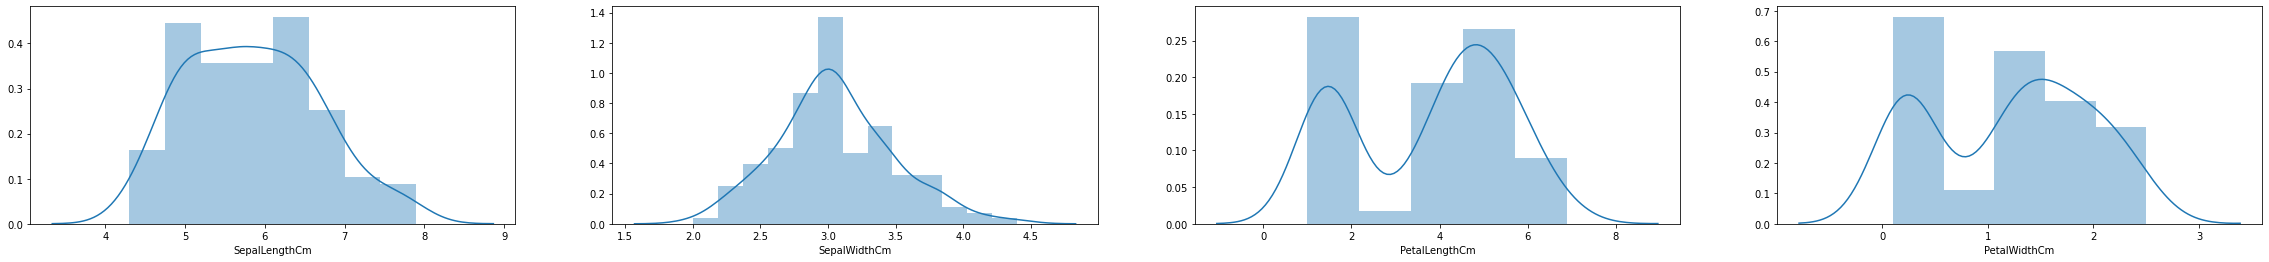

In [7]:
#Visualising the distribution of every attribute

fig,ax=plt.subplots(nrows=1 ,ncols=4)
sns.distplot(data['SepalLengthCm'],ax=ax[0])
sns.distplot(data['SepalWidthCm'],ax=ax[1])
sns.distplot(data['PetalLengthCm'],ax=ax[2])
sns.distplot(data['PetalWidthCm'],ax=ax[3])
fig.set_figwidth(40)

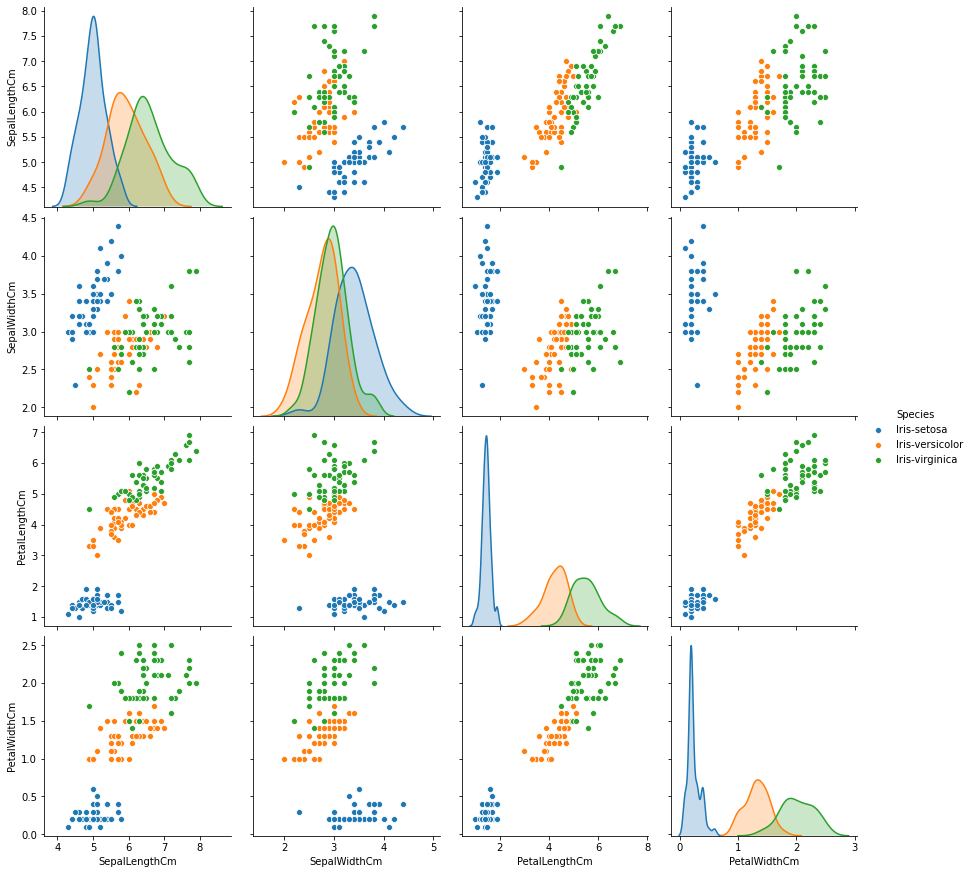

In [8]:
#Visualising and comparing all attributes

sns.pairplot(data, hue='Species', size=3)

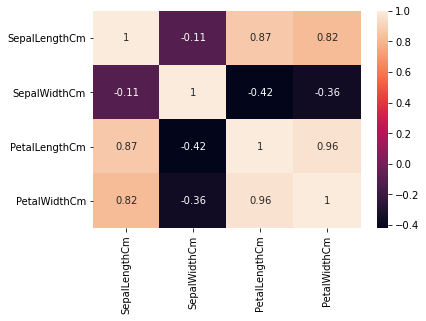

In [9]:
#Checking how the correlation is

sns.heatmap(data.corr(), annot = True)
plt.show()

### Data pre-processing 

In [10]:
#Spliting the dataset in independent and dependent variables

X = data.iloc[:, 0:4].values
y = data['Species'].values

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [11]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Fitting a model

### Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

y_pred = dec_tree.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [24]:
#Evaluating the model

from sklearn.metrics import accuracy_score, confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

[[11  0  0]
 [ 0  8  1]
 [ 0  2  8]]
Accuracy of our model is equal 90.0 %.


In [26]:
#cross validation

from sklearn.model_selection import cross_val_score
print(cross_val_score(dec_tree, X_train, y_train, cv=5))

[0.91666667 1.         1.         0.91666667 0.91666667]
